In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/My Drive/UCL/Repos/Textual-LSD

/content/drive/My Drive/UCL/Repos/Textual-LSD


In [ ]:
!git pull


Already up to date.


In [ ]:
! pip install transformers
! pip install sentencepiece

     |████████████████████████████████| 3.8 MB 4.2 MB/s 
     |████████████████████████████████| 67 kB 7.0 MB/s 
     |████████████████████████████████| 6.5 MB 70.6 MB/s 
     |████████████████████████████████| 596 kB 70.0 MB/s 
     |████████████████████████████████| 895 kB 70.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 1.2 MB 4.1 MB/s 


In [3]:
from tkinter.tix import MAX
import torch
import nltk
import utils
import torch.nn.functional as F

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Using  cuda
Starting Load Dataset...
Succesfully Loaded Dataframe
Starting Load Dataset...
Succesfully Loaded Dataframe
Starting Load Vocab...
training vocab loaded
validation vocab loaded
Successfully Loaded Pickles/NewVocab.pkl into vocabulary
emb32len128drp04dom1
Starting Generate Models...
Models Generated Successfully
Number of batches per epoch: 104
Printing every 25 batches, saving every 10 batches
Epoch 1 / 40
Batch 25 / 104
25 batch average loss: 3.469383201919937
Batch Accuracy: 25.78%

Batch 50 / 104
25 batch average loss: 3.4604803141655345
Batch Accuracy: 25.94%

Batch 75 / 104
25 batch average loss: 3.4532708789812534
Batch Accuracy: 24.38%

Batch 100 / 104
25 batch average loss: 3.454226391726781
Batch Accuracy: 25.70%

Epoch Time: 59.9s

Epoch Accuracy: 25.08%
Accuracy: 25.70%
Accuracy of base quadrant predictions: 25.6962%
Accuracy of VA quadrant predictions: 25.1266%
Confusion matrix of base quadrant predictions: [[ 86. 271.  16.  22.]
 [ 72. 264.  21.  38.]
 [ 61. 27

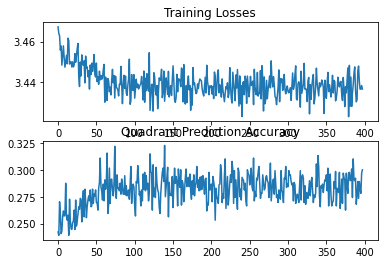

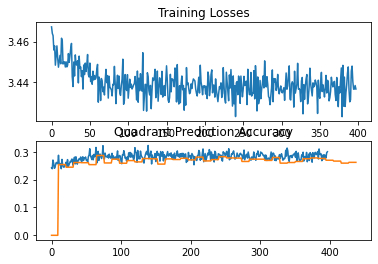

In [4]:
#lstm 

##### Key Variables #####
# Hashed values are those used in the reference paper
EPOCHS = 40
BATCH_SIZE = 128
LR = 3e-4 #2e-5
# USE_VAL = False
# USE_AROU = False
USE_DOM = True

# USE_QUAD = True
FILENAME = 'Datasets/train_balanced.xlsx'
VAL_FILENAME = 'Datasets/validation_bal_3Apr.xlsx'
ATTENTION_HEADS = 8
EMBEDDING_SIZE = 32
NUM_ENCODER_LAYERS = 1
FORWARD_XP = 32
DROPOUT = 0.4
MAXLENGTH = 128
MT_HEADS = 8
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using ', DEVICE)

PRINT_STEP = 25
SAVE_STEP = 10
#w2v = torch.load('w2v_window10_min10_iter10.pkl')
#w2v.requires_grad = False

#%%

trainer = utils.Textual_LSD_TVT(verbose=True)
trainer.load_dataset(FILENAME, MAXLENGTH, BATCH_SIZE)
trainer.load_dataset(VAL_FILENAME, MAXLENGTH, BATCH_SIZE, validation=True)

trainer.load_vocab('Pickles/NewVocab.pkl')

#%%

# trainer.generate_models(EMBEDDING_SIZE, ATTENTION_HEADS, DROPOUT, USE_VAL, USE_AROU, USE_DOM, USE_QUAD,
#                         LR, MT_HEADS, NUM_ENCODER_LAYERS, FORWARD_XP, DEVICE, lr_pat=15, w2v=w2v, version=2)

trainer.generate_models_lstm(EMBEDDING_SIZE,BATCH_SIZE, DROPOUT,USE_DOM, LR, DEVICE, lr_pat=15)#, w2v=w2v)

trainer.train(EPOCHS, PRINT_STEP, SAVE_STEP, enc_version=1,save_epochs=20,validation_freq=1, val_prf=True)
trainer.plot_data(averaging_window=1)

trainer.plot_data(averaging_window=1,validation=True)


Using  cuda
Starting Load Dataset...
Succesfully Loaded Dataframe
Starting Load Dataset...
Succesfully Loaded Dataframe
Starting Load Vocab...
training vocab loaded
validation vocab loaded
Successfully Loaded Pickles/NewVocab.pkl into vocabulary
emb32att8mt8fx32len128drp04dom1
Starting Generate Models...
Models Generated Successfully
Number of batches per epoch: 104
Printing every 25 batches, saving every 10 batches
Epoch 1 / 40
Batch 25 / 104
25 batch average loss: 3.4886102170236266
Batch Accuracy: 23.91%

Batch 50 / 104
25 batch average loss: 3.4831611368603443
Batch Accuracy: 26.33%

Batch 75 / 104
25 batch average loss: 3.4827501285895055
Batch Accuracy: 23.75%

Batch 100 / 104
25 batch average loss: 3.469534833035792
Batch Accuracy: 25.47%

Epoch Time: 57.7s

Epoch Accuracy: 25.03%


/content/drive/My Drive/UCL/Repos/Textual-LSD/utils.py:775: RuntimeWarning: invalid value encountered in true_divide
  precision = TP/(TP+FP)


Accuracy: 23.92%
Accuracy of base quadrant predictions: 23.9241%
Accuracy of VA quadrant predictions: 26.7722%
Confusion matrix of base quadrant predictions: [[  0.  73.   0. 322.]
 [  0.  82.   0. 313.]
 [  0. 107.   0. 288.]
 [  0.  99.   0. 296.]]
Confusion matrix of VA quadrant predictions: [[ 68.  74. 143. 110.]
 [ 64.  98. 107. 126.]
 [ 68.  69. 126. 132.]
 [ 66.  72. 126. 131.]]
Confusion matrix of valence predictions: [[400. 390.]
 [415. 375.]]
Confusion matrix of arousal predictions: [[515. 275.]
 [486. 304.]]
Per-label precision, recall, and f-score of base quadrant predictions: [  nan 0.227   nan 0.243],[0.    0.208 0.    0.749],[  nan 0.217   nan 0.367]
Per-label precision, recall, and f-score of VA quadrant predictions: [0.256 0.313 0.251 0.263],[0.172 0.248 0.319 0.332],[0.206 0.277 0.281 0.293]
Per-label precision, recall, and f-score valence predictions: [0.491 0.49 ],[0.506 0.475],[0.498 0.482]
Per-label precision, recall, and f-score of arousal predictions: [0.514 0.5

/content/drive/My Drive/UCL/Repos/Textual-LSD/utils.py:777: RuntimeWarning: invalid value encountered in true_divide
  f_score = 2*precision*recall/(precision+recall)


Accuracy: 23.10%
Accuracy of base quadrant predictions: 23.1013%
Accuracy of VA quadrant predictions: 25.8861%
Confusion matrix of base quadrant predictions: [[ 29. 134.   0. 232.]
 [ 41. 118.   0. 236.]
 [ 21. 164.   0. 210.]
 [ 20. 154.   3. 218.]]
Confusion matrix of VA quadrant predictions: [[114.  68.  70. 143.]
 [116.  81.  59. 139.]
 [ 87.  96.  62. 150.]
 [ 95.  94.  54. 152.]]
Confusion matrix of valence predictions: [[298. 492.]
 [286. 504.]]
Confusion matrix of arousal predictions: [[418. 372.]
 [411. 379.]]
Per-label precision, recall, and f-score of base quadrant predictions: [0.261 0.207 0.    0.243],[0.073 0.299 0.    0.552],[0.115 0.245   nan 0.338]
Per-label precision, recall, and f-score of VA quadrant predictions: [0.277 0.239 0.253 0.26 ],[0.289 0.205 0.157 0.385],[0.283 0.221 0.194 0.311]
Per-label precision, recall, and f-score valence predictions: [0.51  0.506],[0.377 0.638],[0.434 0.564]
Per-label precision, recall, and f-score of arousal predictions: [0.504 0.5

/content/drive/My Drive/UCL/Repos/Textual-LSD/utils.py:777: RuntimeWarning: invalid value encountered in true_divide
  f_score = 2*precision*recall/(precision+recall)


Accuracy: 26.58%
Accuracy of base quadrant predictions: 26.5823%
Accuracy of VA quadrant predictions: 26.9620%
Confusion matrix of base quadrant predictions: [[204.  94.   5.  92.]
 [187. 104.   2. 102.]
 [184.  97.   0. 114.]
 [193.  89.   1. 112.]]
Confusion matrix of VA quadrant predictions: [[ 32.  76.  16. 271.]
 [ 41.  87.  22. 245.]
 [ 40.  69.  34. 252.]
 [ 39.  61.  22. 273.]]
Confusion matrix of valence predictions: [[212. 578.]
 [175. 615.]]
Confusion matrix of arousal predictions: [[581. 209.]
 [554. 236.]]
Per-label precision, recall, and f-score of base quadrant predictions: [0.266 0.271 0.    0.267],[0.516 0.263 0.    0.284],[0.351 0.267   nan 0.275]
Per-label precision, recall, and f-score of VA quadrant predictions: [0.211 0.297 0.362 0.262],[0.081 0.22  0.086 0.691],[0.117 0.253 0.139 0.38 ]
Per-label precision, recall, and f-score valence predictions: [0.548 0.516],[0.268 0.778],[0.36 0.62]
Per-label precision, recall, and f-score of arousal predictions: [0.512 0.53 

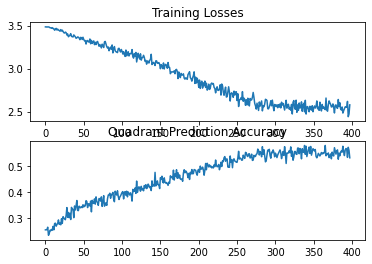

In [7]:

#transformer
EPOCHS = 40
BATCH_SIZE = 128
LR = 3e-4 #2e-5
# USE_VAL = False
# USE_AROU = False
USE_DOM = True

# USE_QUAD = True
FILENAME = 'Datasets/train_balanced.xlsx'
VAL_FILENAME = 'Datasets/validation_bal_3Apr.xlsx'
ATTENTION_HEADS = 8
EMBEDDING_SIZE = 32
NUM_ENCODER_LAYERS = 1
FORWARD_XP = 32
DROPOUT = 0.4
MAXLENGTH = 128
MT_HEADS = 8
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using ', DEVICE)

PRINT_STEP = 25
SAVE_STEP = 10
#w2v = torch.load('w2v_window10_min10_iter10.pkl')
#w2v.requires_grad = False
trainer = utils.Textual_LSD_TVT(verbose=True)
trainer.load_dataset(FILENAME, MAXLENGTH, BATCH_SIZE)#, validation=True)
trainer.load_dataset(VAL_FILENAME, MAXLENGTH, BATCH_SIZE, validation=True)

#trainer.load_vocab('vocab_emb64.pkl')
trainer.load_vocab('Pickles/NewVocab.pkl')
trainer.generate_models(EMBEDDING_SIZE, ATTENTION_HEADS, DROPOUT, USE_DOM,
                        LR, MT_HEADS, NUM_ENCODER_LAYERS, FORWARD_XP, DEVICE, lr_pat=15)
trainer.train(EPOCHS, PRINT_STEP, SAVE_STEP, enc_version=1,save_epochs=2,validation_freq=1,val_prf=True)

trainer.plot_data(averaging_window=1)

In [8]:
TEST_FILENAME= "Datasets/test_bal_3Apr.xlsx"

trainer.load_dataset(TEST_FILENAME, MAXLENGTH, BATCH_SIZE, validation=True)
trainer.load_vocab('Pickles/NewVocab.pkl')
trainer.test()

Starting Load Dataset...
Succesfully Loaded Dataframe
Starting Load Vocab...
training vocab loaded
validation vocab loaded
Successfully Loaded Pickles/NewVocab.pkl into vocabulary
Testing:
0.0% Complete
Testing:
7.7% Complete
Testing:
15.4% Complete
Testing:
23.1% Complete
Testing:
30.8% Complete
Testing:
38.5% Complete
Testing:
46.2% Complete
Testing:
53.8% Complete
Testing:
61.5% Complete
Testing:
69.2% Complete
Testing:
76.9% Complete
Testing:
84.6% Complete
Testing:
92.3% Complete
Accuracy: 28.30%
Accuracy of base quadrant predictions: 28.3042%
Accuracy of VA quadrant predictions: 26.6833%
Confusion matrix of base quadrant predictions: [[154.  41. 109.  97.]
 [130.  34. 126. 111.]
 [115.  35. 149. 102.]
 [118.  41. 125. 117.]]
Confusion matrix of VA quadrant predictions: [[ 94.  38.  62. 207.]
 [ 68.  31.  63. 239.]
 [ 54.  39.  63. 245.]
 [ 65.  35.  61. 240.]]
Confusion matrix of valence predictions: [[196. 606.]
 [196. 606.]]
Confusion matrix of arousal predictions: [[609. 193.]

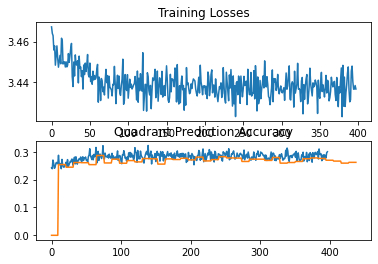

In [6]:
trainer.plot_data(averaging_window=1,validation=True)